In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [74]:
batting = pd.read_csv('ODI data.csv')
batting.head()

Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0           0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426   
1           1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   
2           2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   
3           3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   
4           4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   

     HS    Ave     BF     SR 100  50   0  Unnamed: 13  
0  200*  44.83  21367  86.23  49  96  20          NaN  
1   169  41.98  18048  78.86  25  93  15          NaN  
2   164  42.03  17046  80.39  30  82  20          NaN  
3   189  32.36  14725   91.2  28  68  34          NaN  
4   144  33.37  16020  78.96  19  77  28          NaN

In [75]:
batting.dtypes

Unnamed: 0       int64
Player          object
Span            object
Mat              int64
Inns            object
NO              object
Runs            object
HS              object
Ave             object
BF              object
SR              object
100             object
50              object
0               object
Unnamed: 13    float64
dtype: object

In [76]:
batting['Inns'] = pd.to_numeric(batting['Inns'], errors='coerce')
batting['Mat'] = pd.to_numeric(batting['Mat'], errors='coerce')
batting['NO'] = pd.to_numeric(batting['NO'], errors='coerce')
batting['Runs'] = pd.to_numeric(batting['Runs'], errors='coerce')
batting['HS'] = pd.to_numeric(batting['HS'], errors='coerce')
batting['Ave'] = pd.to_numeric(batting['Ave'], errors='coerce')
batting['BF'] = pd.to_numeric(batting['BF'], errors='coerce')
batting['SR'] = pd.to_numeric(batting['SR'], errors='coerce')
batting['50'] = pd.to_numeric(batting['50'], errors='coerce')
batting['100'] = pd.to_numeric(batting['100'], errors='coerce')
batting['0'] = pd.to_numeric(batting['0'], errors='coerce')

In [77]:
batting = batting.replace('-', 0)
batting = batting.replace('- ', 0)
batting = batting.replace(' -', 0)
batting = batting.replace(' - ', 0)

In [78]:
batting[['Start Year','End Year']] = batting.Span.str.split("-",expand=True) 

In [79]:
batting.drop(columns=['Unnamed: 0'], inplace=True)

In [80]:
batting.drop(columns=['Span'], inplace=True)

In [81]:
batting.drop(columns=['Unnamed: 13'], inplace=True)

In [82]:
batting.isnull().sum()

Player          0
Mat             0
Inns           10
NO             10
Runs           10
HS            795
Ave           130
BF             10
SR             19
100            10
50             10
0              10
Start Year      0
End Year        0
dtype: int64

In [13]:
batting_data.dtypes

Player     object
Mat         int64
Inns      float64
NO        float64
Runs      float64
HS        float64
Ave       float64
BF        float64
SR        float64
100       float64
50        float64
0         float64
Strt       object
End        object
dtype: object

In [85]:
batting = batting.dropna()

In [86]:
batting_data.isnull().sum()

Player     0
Mat        0
Inns       0
NO         0
Runs       0
HS         0
Ave        0
BF         0
SR         0
100        0
50         0
0          0
Country    0
dtype: int64

In [88]:
batting.Player

1       KC Sangakkara (Asia/ICC/SL)
2              RT Ponting (AUS/ICC)
3           ST Jayasuriya (Asia/SL)
4        DPMD Jayawardene (Asia/SL)
6                   V Kohli (INDIA)
                   ...             
2484                 GS Sobers (WI)
2485             Tanvir Mehdi (PAK)
2487                R Walters (NAM)
2488             CM Willoughby (SA)
2489          Zakir Hossain (BDESH)
Name: Player, Length: 1704, dtype: object

In [89]:
batting.Player.str.split(" ")
batting['Country'] = batting.Player.str.split(" ").str.get(-1)
batting['Player Name'] = batting.Player.str.split(" ").str.get(1)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2125214459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Country'] = batting.Player.str.split(" ").str.get(-1)
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2125214459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Player Name'] = batting.Player.str.split(" ").str.get(1)


In [90]:
batting['Player'] = batting['Player Name']
batting.drop(columns=['Player Name'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\1461254902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Player'] = batting['Player Name']
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\1461254902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting.drop(columns=['Player Name'], inplace=True)


In [91]:
batting['Start Year'] = pd.to_numeric(batting['Start Year'], errors='coerce')
batting['End Year'] = pd.to_numeric(batting['End Year'], errors='coerce')

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2757186606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Start Year'] = pd.to_numeric(batting['Start Year'], errors='coerce')
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2757186606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['End Year'] = pd.to_numeric(batting['End Year'], errors='coerce')


In [23]:
batting_data.head()

Player  Mat   Inns    NO     Runs     HS    Ave       BF     SR   100  \
1   Sangakkara  404  380.0  41.0  14234.0  169.0  41.98  18048.0  78.86  25.0   
2      Ponting  375  365.0  39.0  13704.0  164.0  42.03  17046.0  80.39  30.0   
3   Jayasuriya  445  433.0  18.0  13430.0  189.0  32.36  14725.0  91.20  28.0   
4  Jayawardene  448  418.0  39.0  12650.0  144.0  33.37  16020.0  78.96  19.0   
6        Kohli  242  233.0  39.0  11609.0  183.0  59.84  12445.0  93.28  43.0   

     50     0  Strt   End        Country  
1  93.0  15.0  2000  2015  (Asia/ICC/SL)  
2  82.0  20.0  1995  2012      (AUS/ICC)  
3  68.0  34.0  1989  2011      (Asia/SL)  
4  77.0  28.0  1998  2015      (Asia/SL)  
6  55.0  13.0  2008  2019        (INDIA)

In [24]:
batting_data.describe()

Mat         Inns           NO          Runs           HS  \
count  1704.000000  1704.000000  1704.000000   1704.000000  1704.000000   
mean     33.572770    27.036385     4.379695    612.981221    47.718897   
std      55.919816    48.548780     8.338949   1518.113083    42.298331   
min       1.000000     1.000000     0.000000      0.000000     0.000000   
25%       3.000000     3.000000     0.000000     24.000000    14.000000   
50%      11.000000     8.000000     1.000000    100.500000    36.000000   
75%      38.000000    27.000000     4.250000    426.250000    71.000000   
max     448.000000   433.000000    72.000000  14234.000000   264.000000   

               Ave            BF           SR          100           50  \
count  1704.000000   1704.000000  1704.000000  1704.000000  1704.000000   
mean     17.306232    817.100352    62.315816     0.660798     3.189554   
std      12.082055   1902.968623    26.077227     2.868823     9.205483   
min       0.000000      1.000000     0.000000     0.000000     0.000000   
25%       8.000000     47.000000    47.760000     0.000000     0.000000   
50%      15.470000    170.000000    63.090000     0.000000     0.000000   
75%      24.425000    612.000000    77.170000     0.000000     2.000000   
max      95.000000  18048.000000   328.570000    43.000000    93.000000   

                 0         Strt          End  
count  1704.000000  1704.000000  1704.000000  
mean      2.292254  2000.197183  2004.106808  
std       3.744047    13.275785    13.137391  
min       0.000000  1971.000000  1971.000000  
25%       0.000000  1992.000000  1996.000000  
50%       1.000000  2003.000000  2007.000000  
75%       3.000000  2010.000000  2016.000000  
max      34.000000  2019.000000  2019.000000

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\3804379805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(batting.corr(), annot = True, cmap="coolwarm")


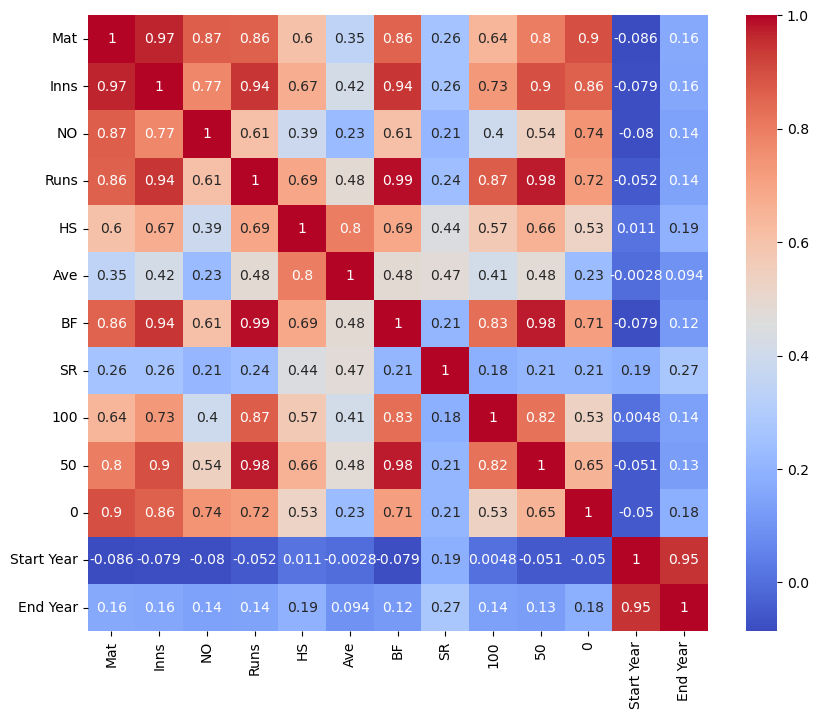

In [92]:
plt.figure(figsize = (10, 8))
sns.heatmap(batting.corr(), annot = True, cmap="coolwarm")
plt.savefig('Correlation')
plt.show()

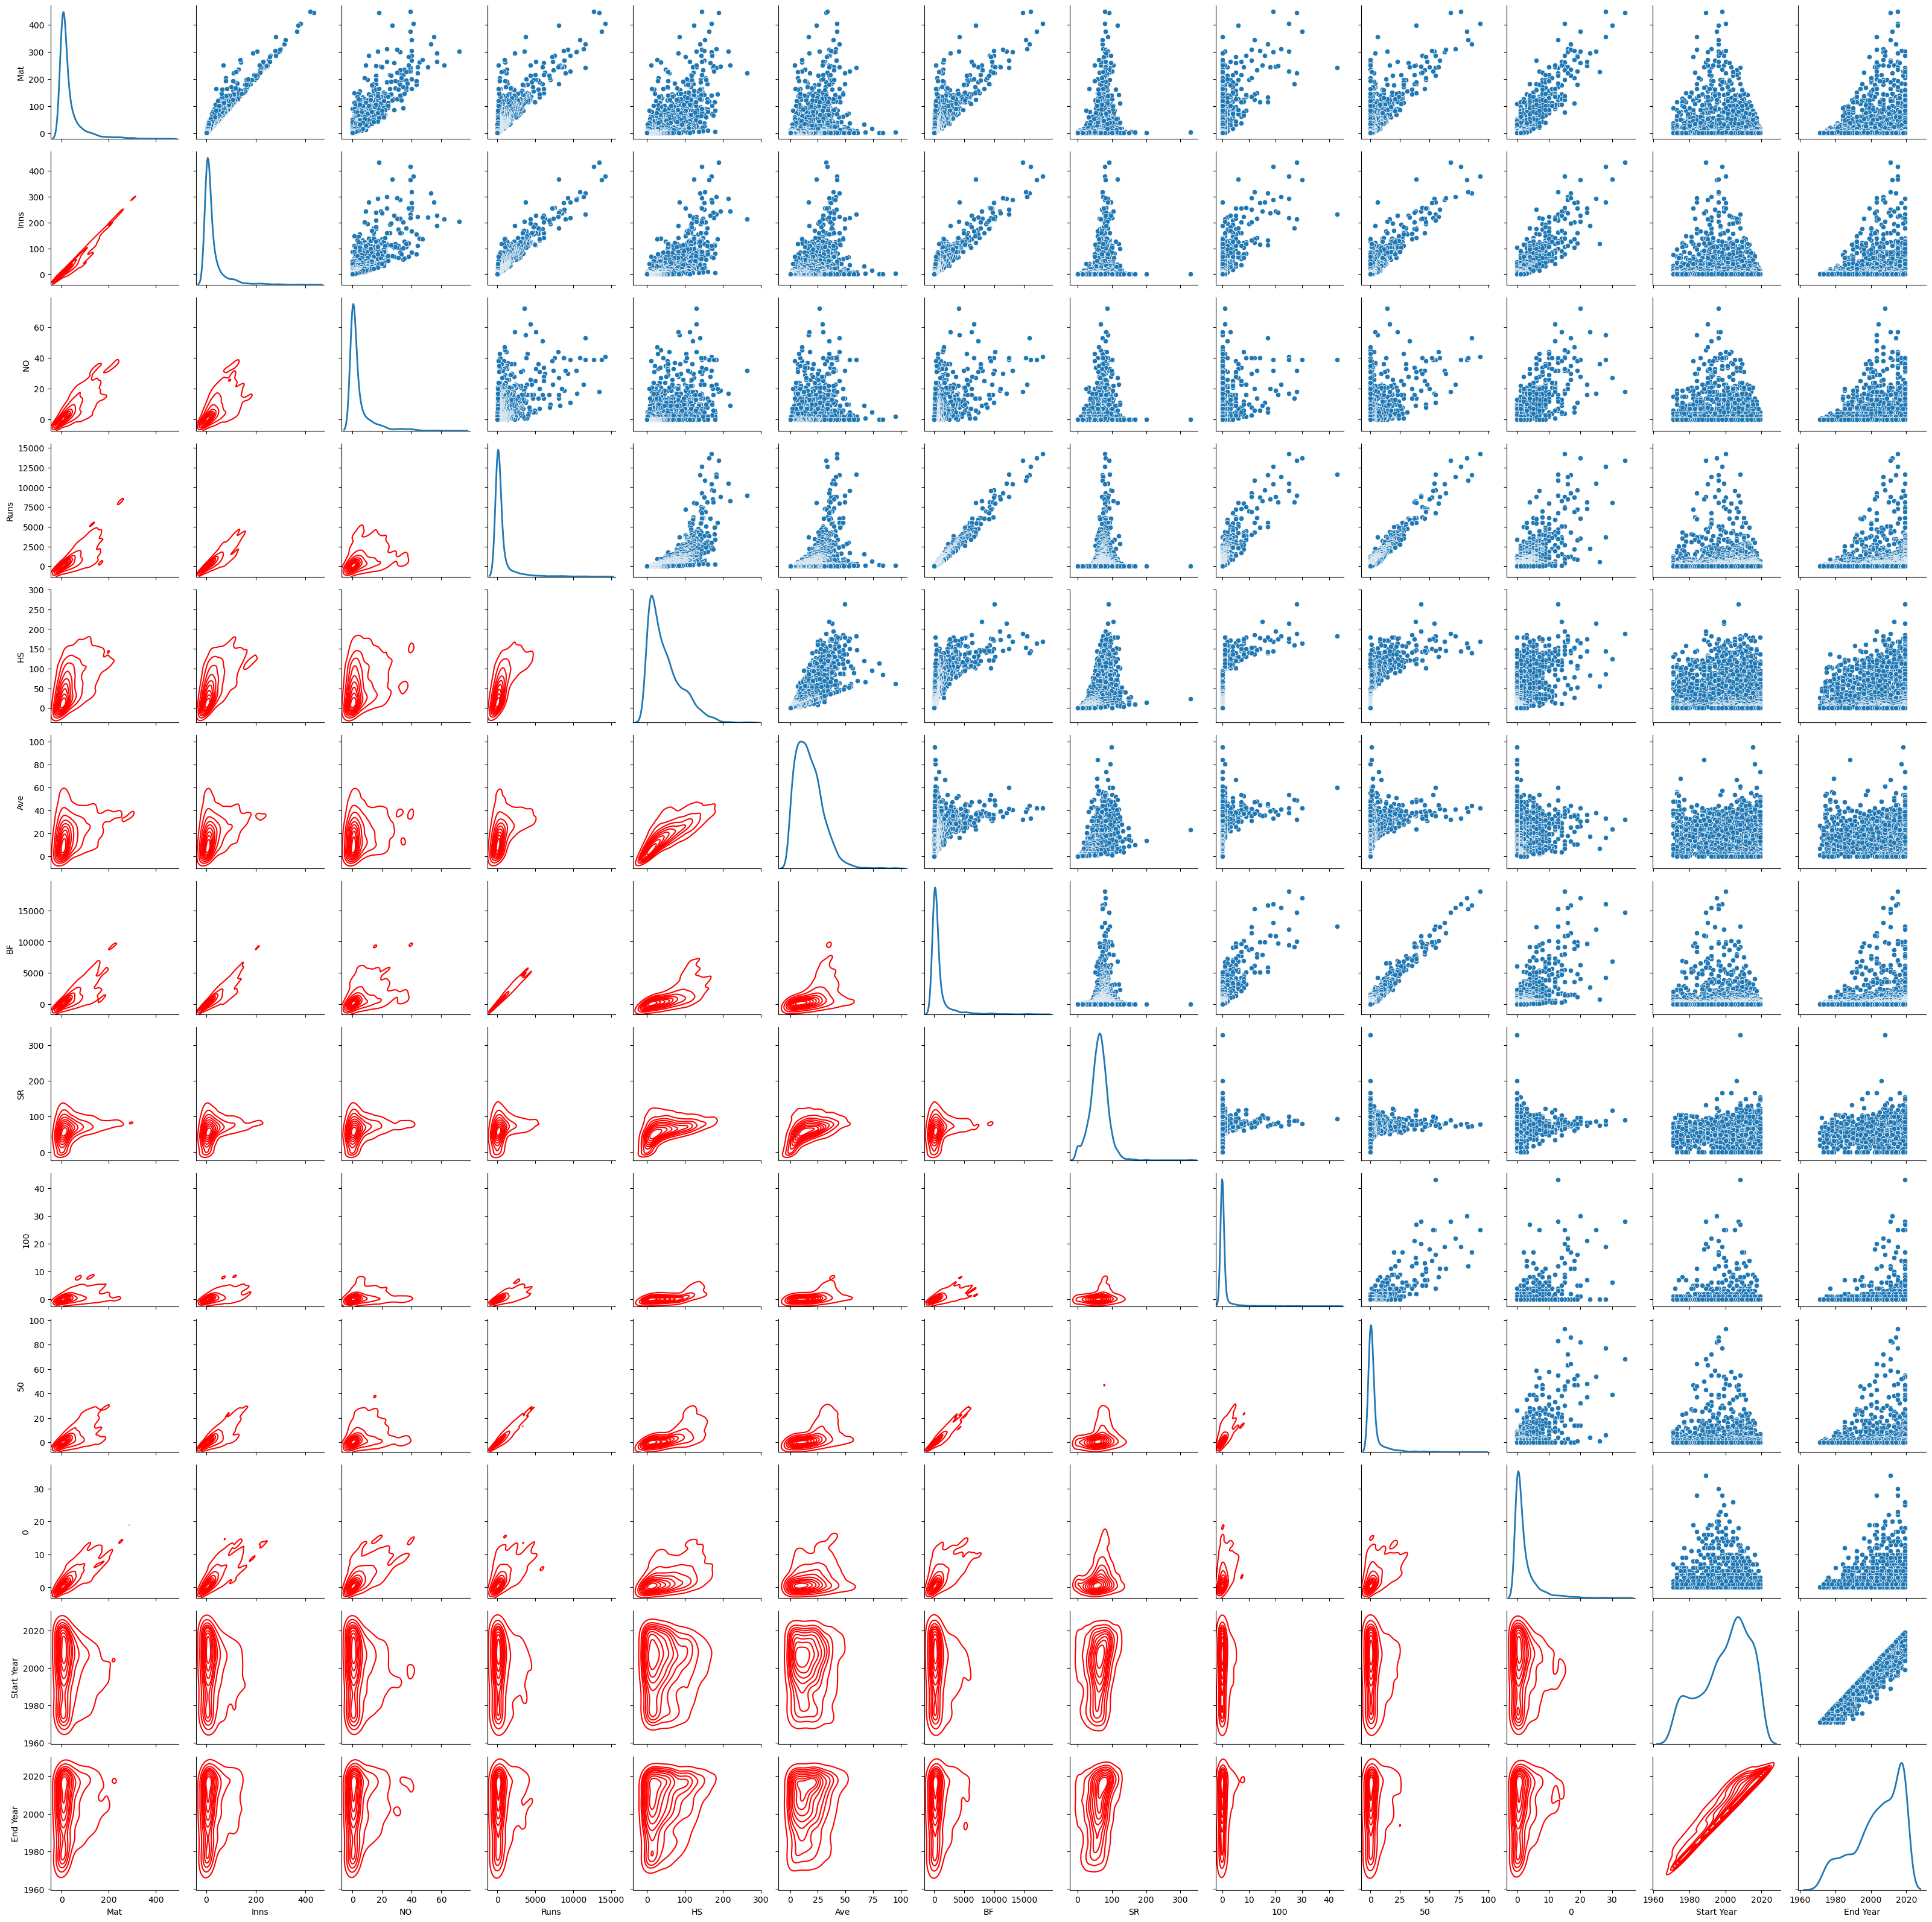

In [93]:
a = sns.PairGrid(batting, diag_sharey=False)
a.map_upper(sns.scatterplot)
a.map_lower(sns.kdeplot, colors="red")
a.map_diag(sns.kdeplot, lw=2)
plt.show()

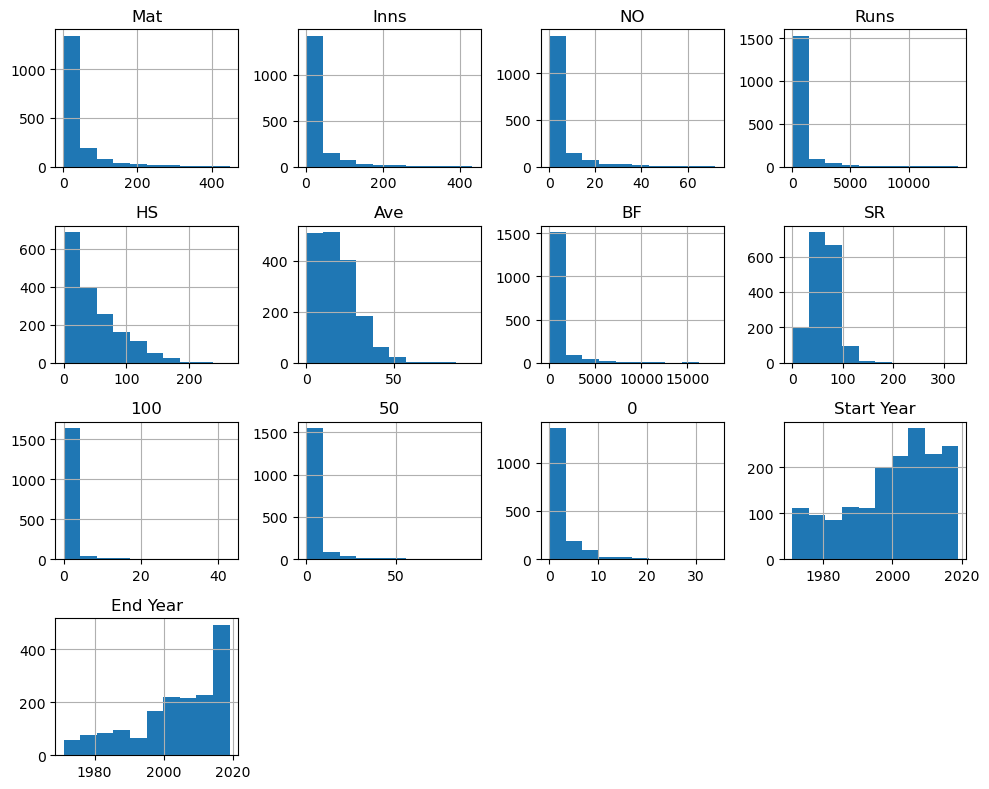

In [94]:
batting.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

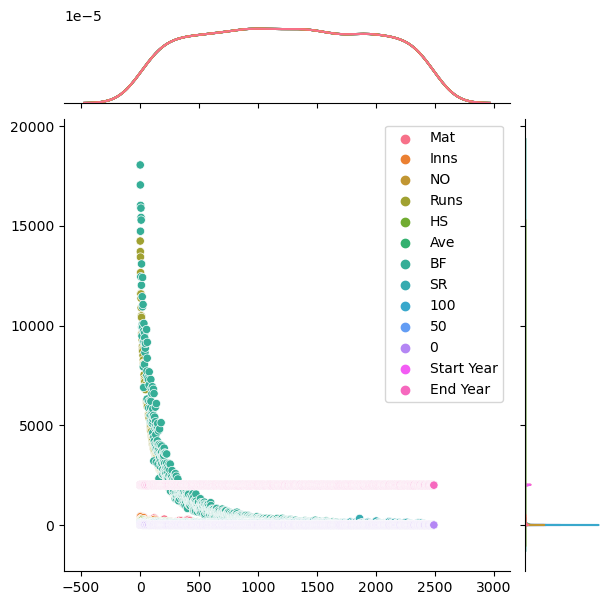

In [95]:
a = sns.JointGrid(data=batting, height=6)
a = a.plot(sns.scatterplot, sns.kdeplot)
plt.show()

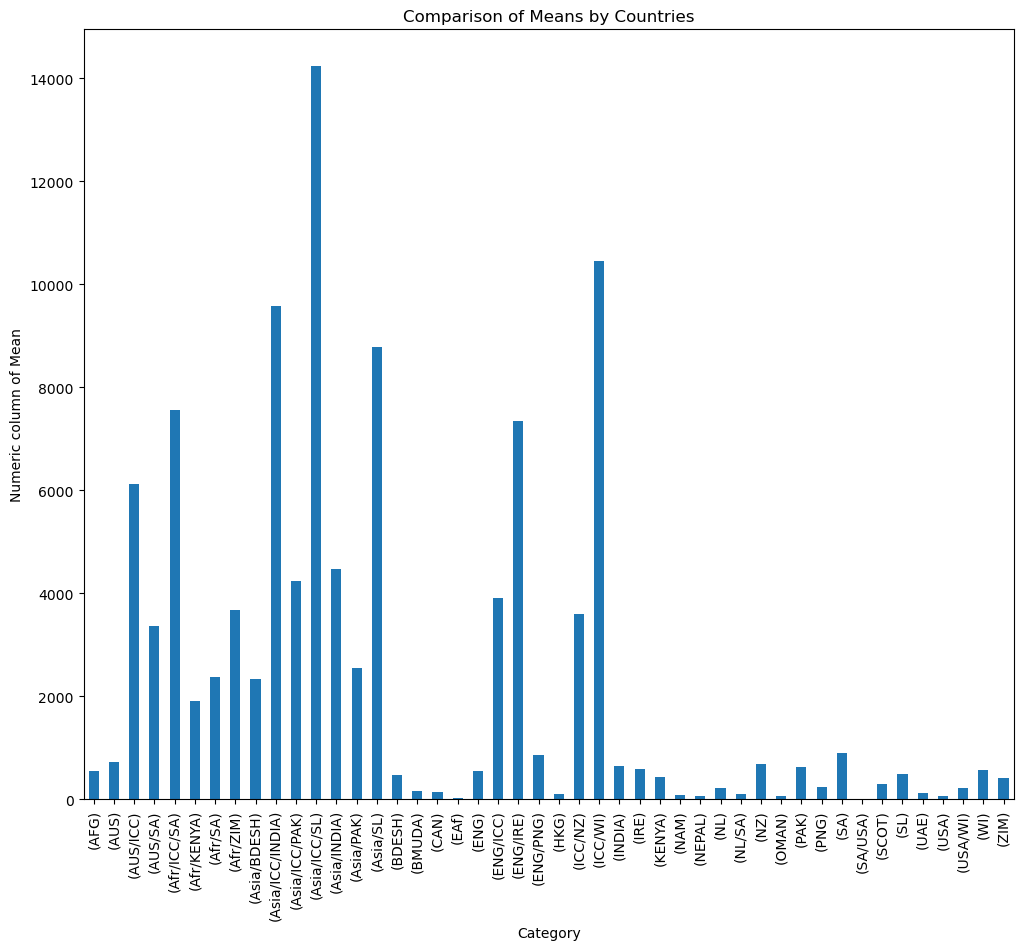

In [96]:
batting.groupby('Country')['Runs'].mean().plot(kind='bar', figsize=(12, 10))
plt.xlabel('Category')
plt.ylabel('Numeric column of Mean')
plt.title('Comparison of Means by Countries')
plt.show()

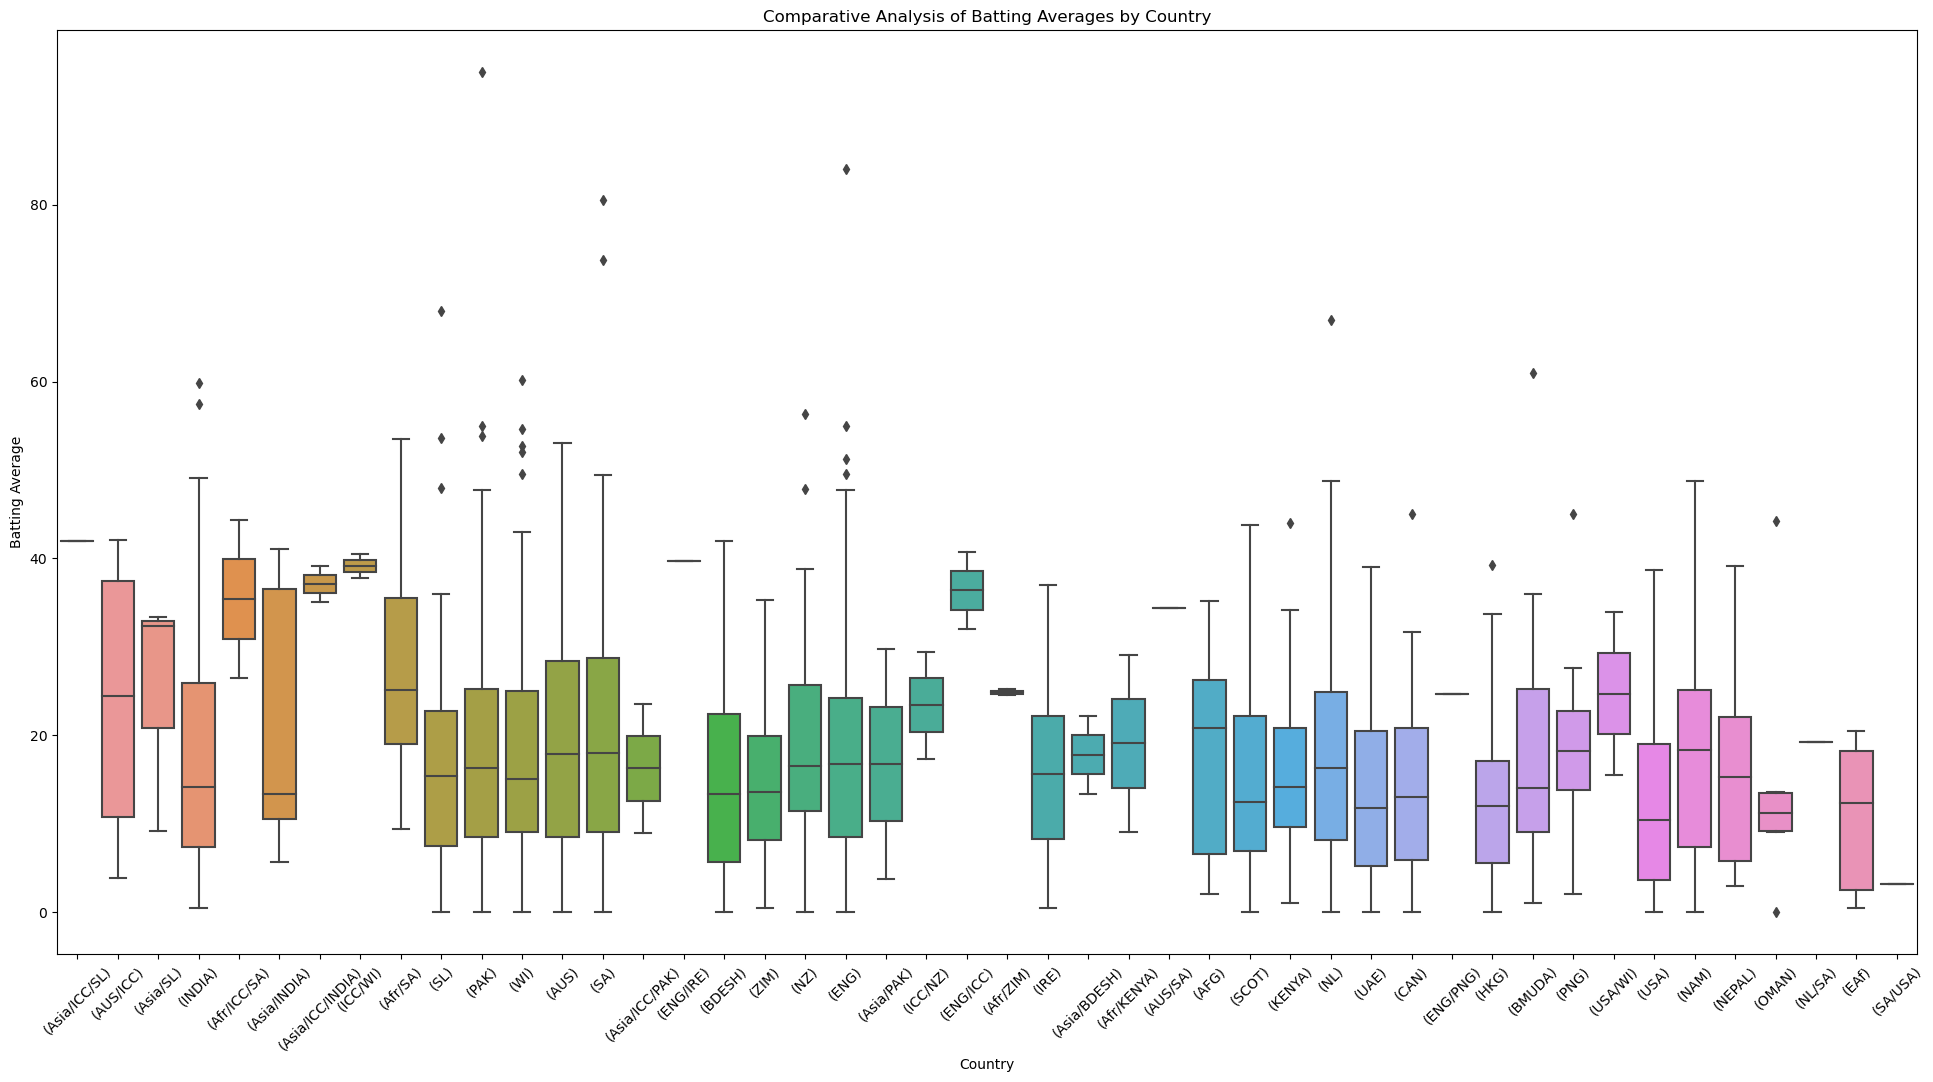

In [98]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=batting, x='Country', y='Ave')
plt.title('Comparative Analysis of Batting Averages by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

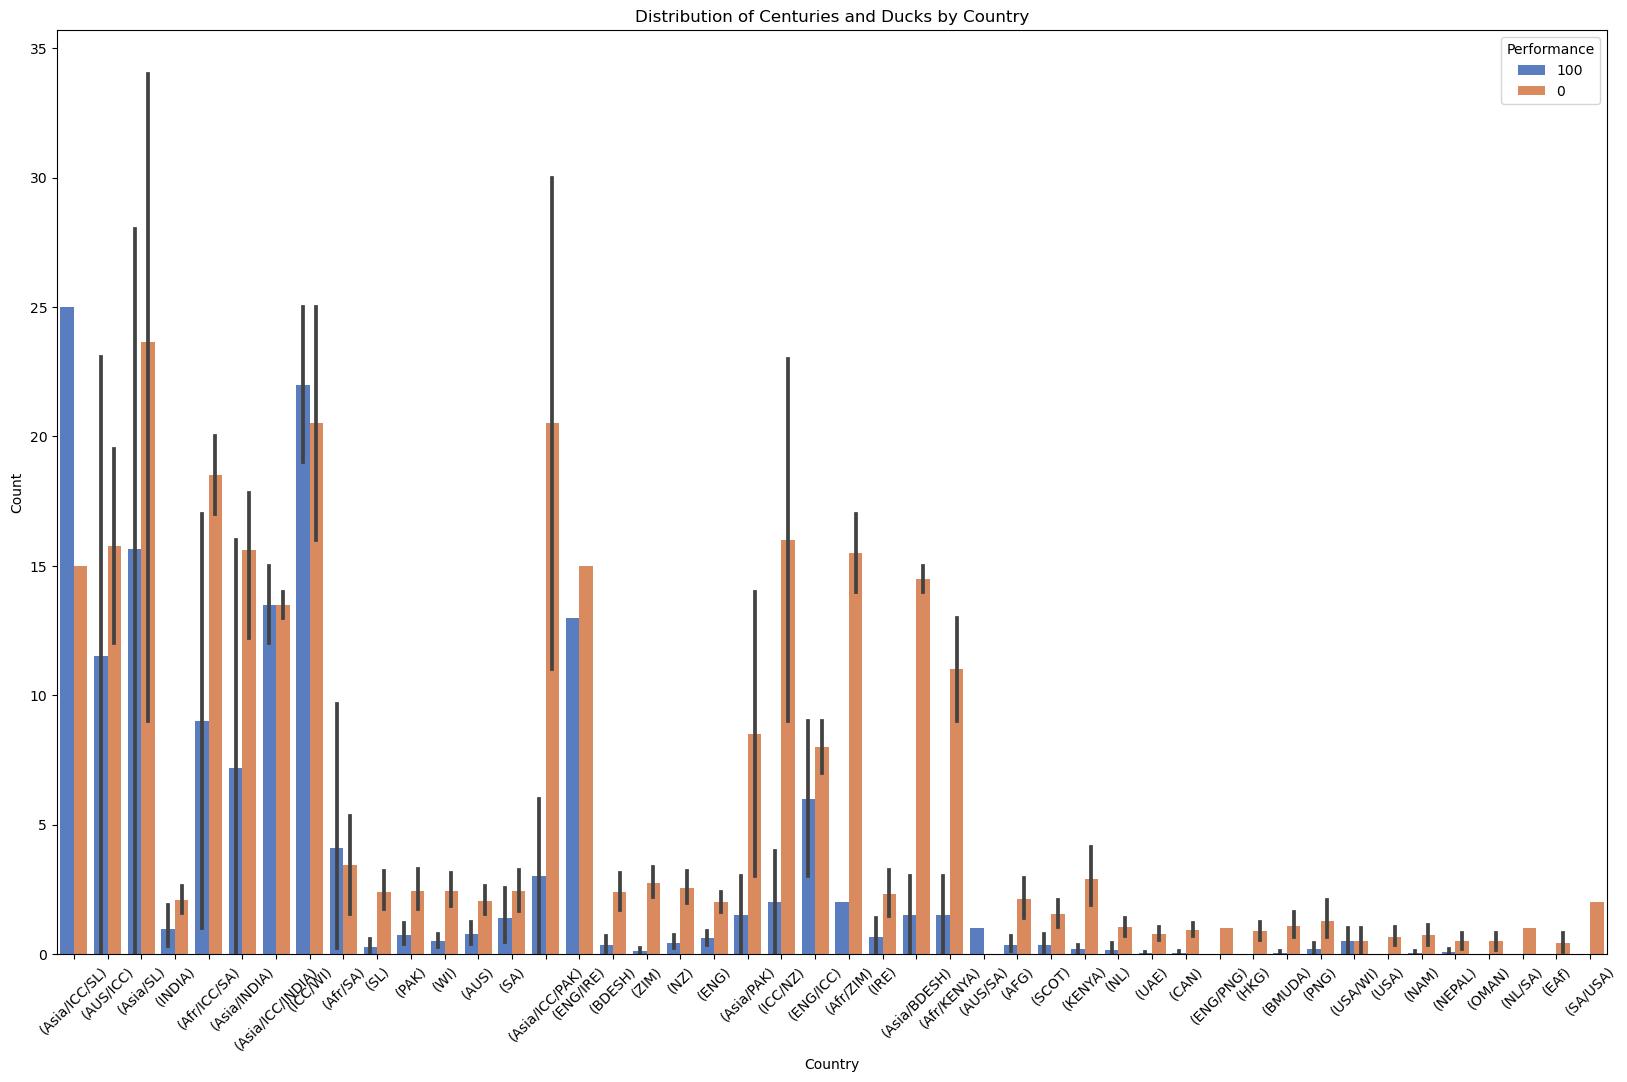

In [99]:
c_d = batting[['Country', '100', '0']].melt(id_vars='Country', var_name='Performance', value_name='Count')
plt.figure(figsize=(20, 12))
sns.barplot(data=c_d, x='Country', y='Count', hue='Performance', palette='muted')
plt.title('Distribution of Centuries and Ducks by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Performance')
plt.show()

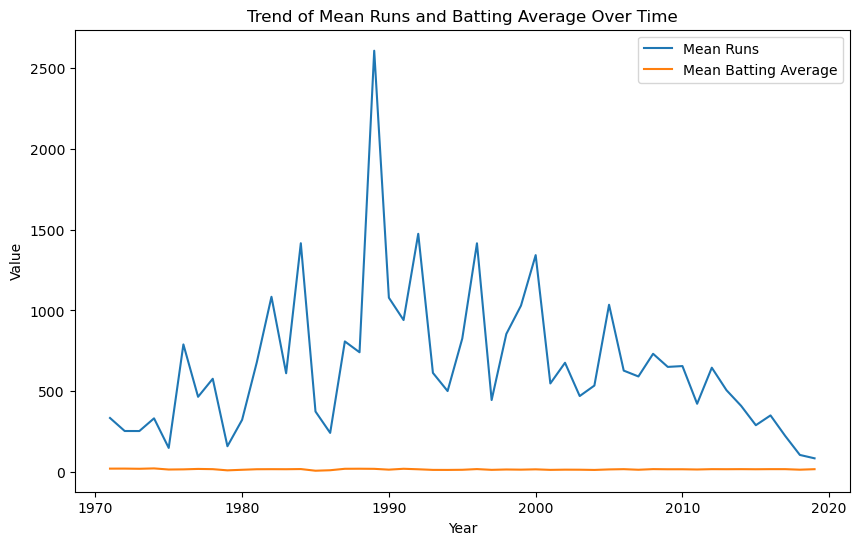

In [101]:
mean_runs = batting.groupby('Start Year')['Runs'].mean().reset_index()
mean_average = batting.groupby('Start Year')['Ave'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_runs, x='Start Year', y='Runs', label='Mean Runs')
sns.lineplot(data=mean_average, x='Start Year', y='Ave', label='Mean Batting Average')
plt.title('Trend of Mean Runs and Batting Average Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

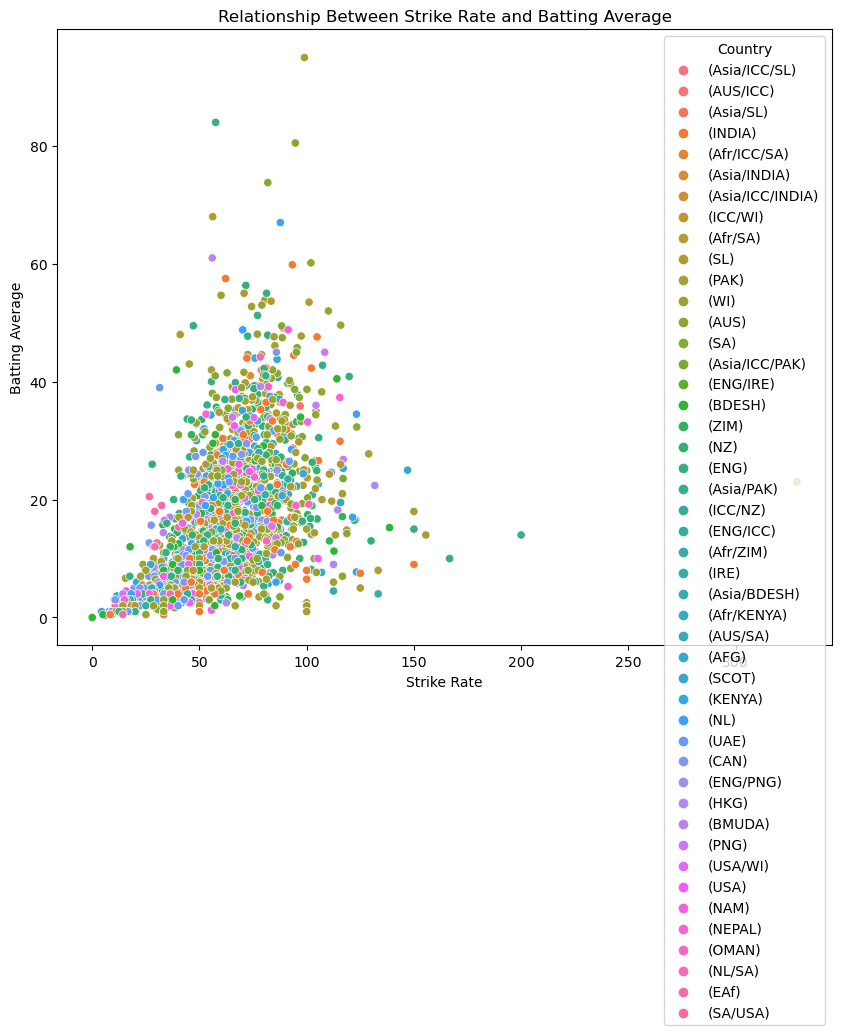

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=batting, x='SR', y='Ave', hue='Country')
plt.title('Relationship Between Strike Rate and Batting Average')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.legend(title='Country')
plt.show()

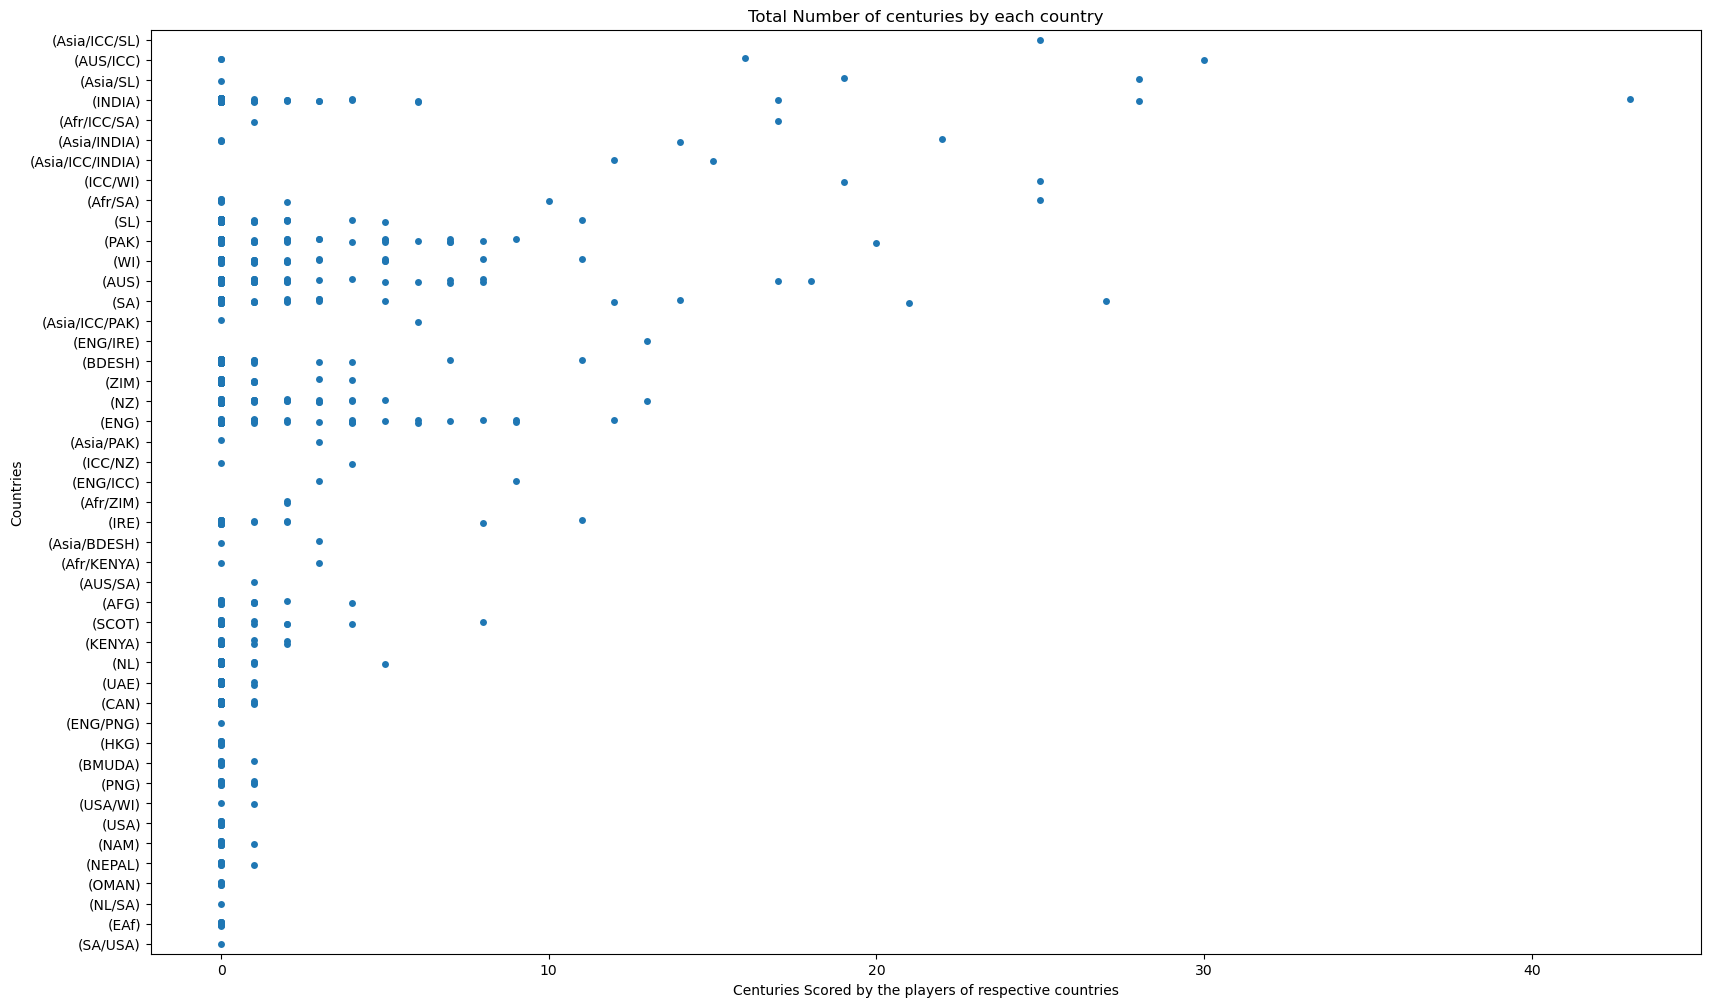

In [103]:
plt.figure(figsize=(20, 12))
sns.stripplot(y='Country', x='100', data=batting)
plt.xlabel('Centuries Scored by the players of respective countries')
plt.ylabel('Countries')
plt.title('Total Number of centuries by each country')
plt.show()

In [109]:
batting['Start Year'] = pd.to_datetime(batting['Start Year'], format='%Y')
batting['End Year'] = pd.to_datetime(batting['End Year'], format='%Y')
batting.set_index(['Start Year', 'End Year'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2813342307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['Start Year'] = pd.to_datetime(batting['Start Year'], format='%Y')
C:\Users\choks\AppData\Local\Temp\ipykernel_16764\2813342307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting['End Year'] = pd.to_datetime(batting['End Year'], format='%Y')


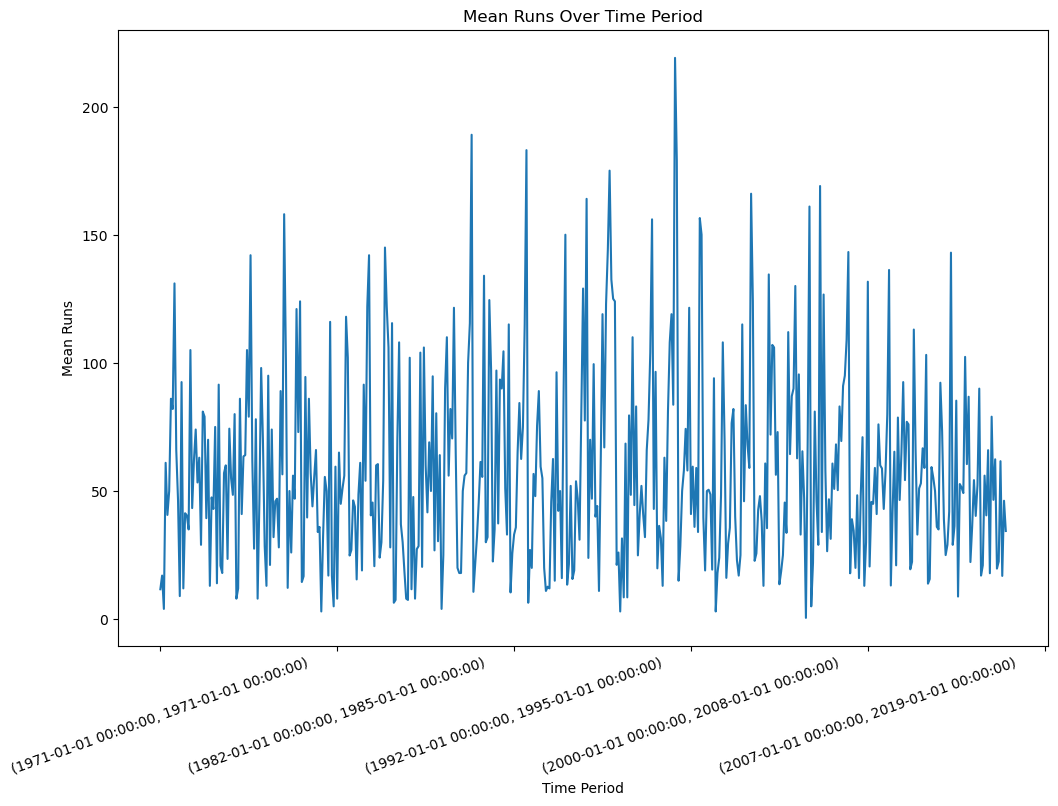

In [113]:
plt.figure(figsize=(20, 10))
runs = batting['HS'].groupby(level=[0, 1]).mean()
runs.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

In [114]:
x = range(len(runs))
y = runs.values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)

Slope: 0.004766525900676225
Intercept: 57.29989931768411
R-squared: 0.0002950029785430947
P-value: 0.7076954349316622


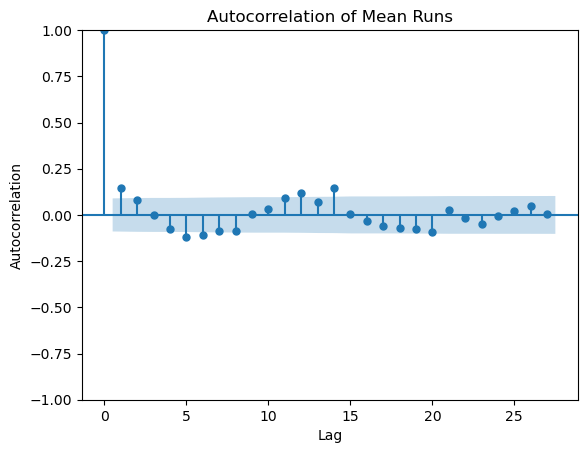

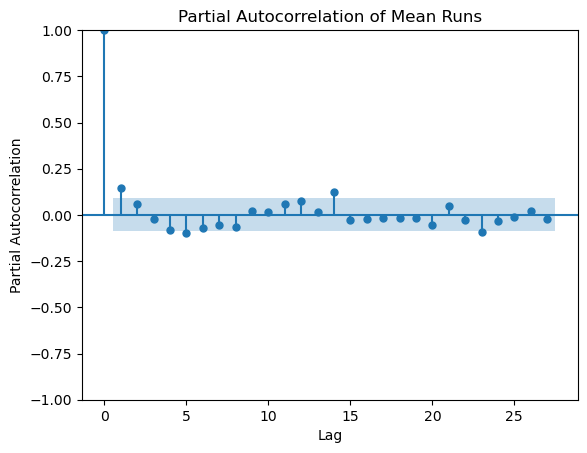

In [115]:
plot_acf(runs)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Mean Runs')
plt.show()

plot_pacf(runs)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation of Mean Runs')
plt.show()

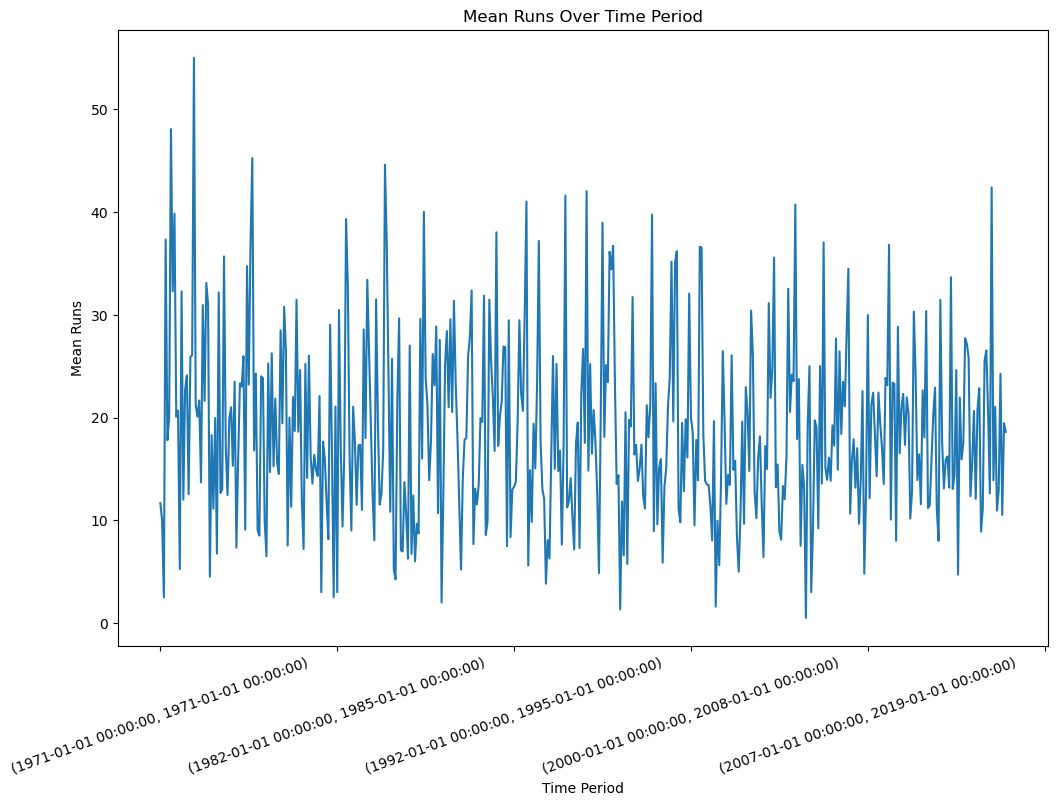

In [116]:
plt.figure(figsize=(20, 10))
amean = batting['Ave'].groupby(level=[0, 1]).mean()
amean.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

## Hypothesis: There is no significant difference between the mean strike rates of the countries 
As it can be seen that the P-value is low and a higher F-statistic indicates a larger difference, hence rejecting this hypothesis.

In [117]:
grouped = [batting[batting['Country'] == group]['SR'] for group in batting['Country'].unique()]
f_statistic, p_value = f_oneway(*grouped)
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.6123222155644483
P-value: 4.7397555314339173e-08


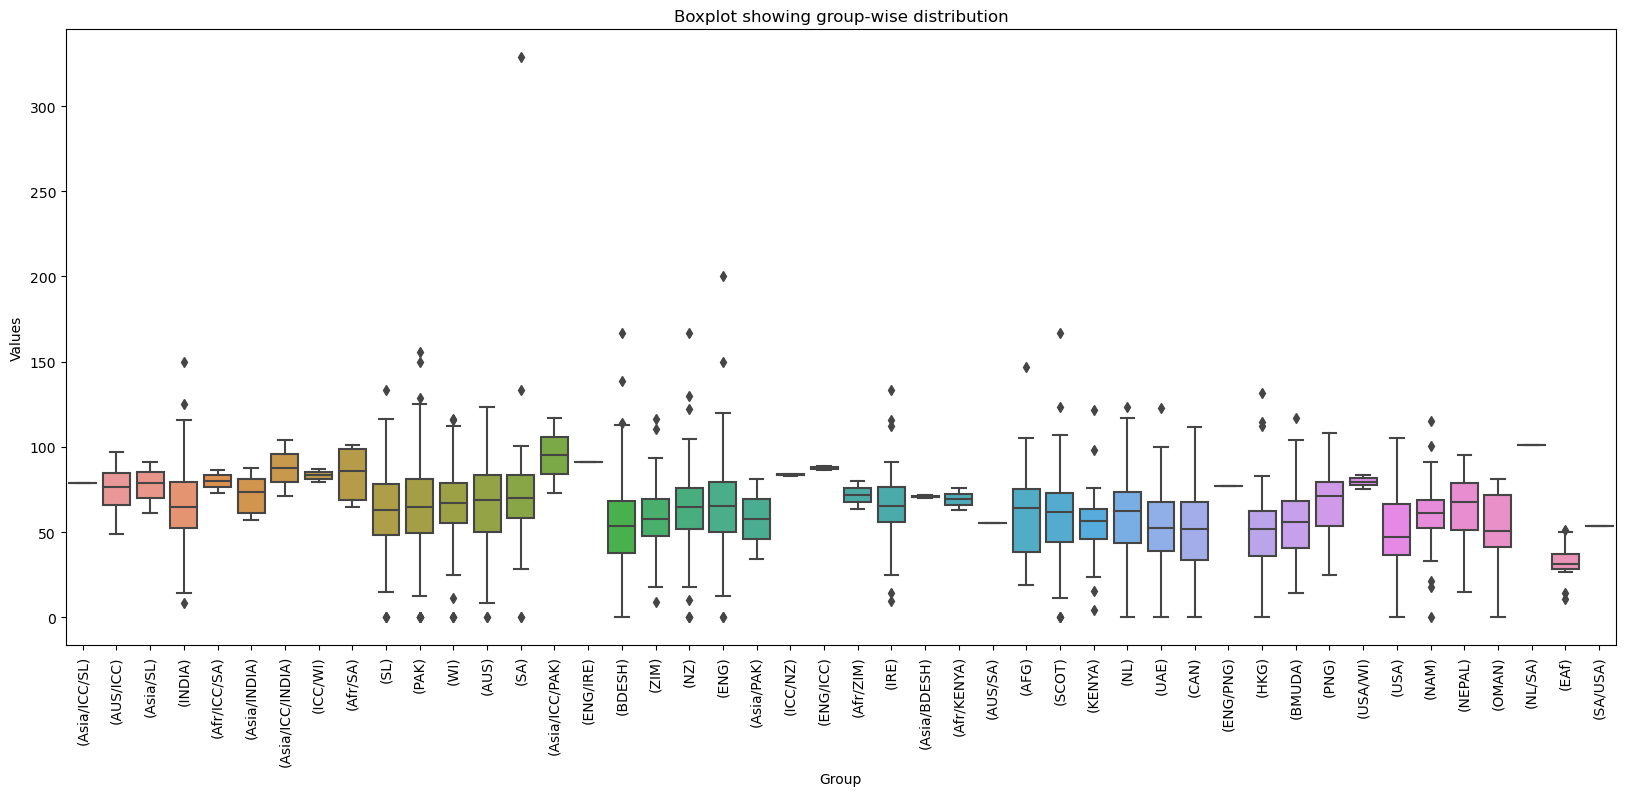

In [118]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Country', y='SR', data=batting)
plt.xticks(rotation=90) 
plt.title('Boxplot showing group-wise distribution')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

## Hypothesis: There is a significant difference in the mean runs scored between players from India and Australia
It can be interpreted from the T-statistic and the P-value that there is a significant difference between both the teams which suggests strong evidence against the null hypothesis. 


In [119]:
 g1 = batting[batting['Country'] == '(INDIA)']['Runs']
 g2 = batting[batting['Country'] == '(AUS/ICC)']['Runs']
 groups = [group1, group2]
 t_stat, p_value = stats.ttest_ind(group1, group2)
 print(f"T-statistic: {t_stat}\nP-value: {p_value}")


T-statistic: -5.8876963037576955
P-value: 2.984816221086509e-08


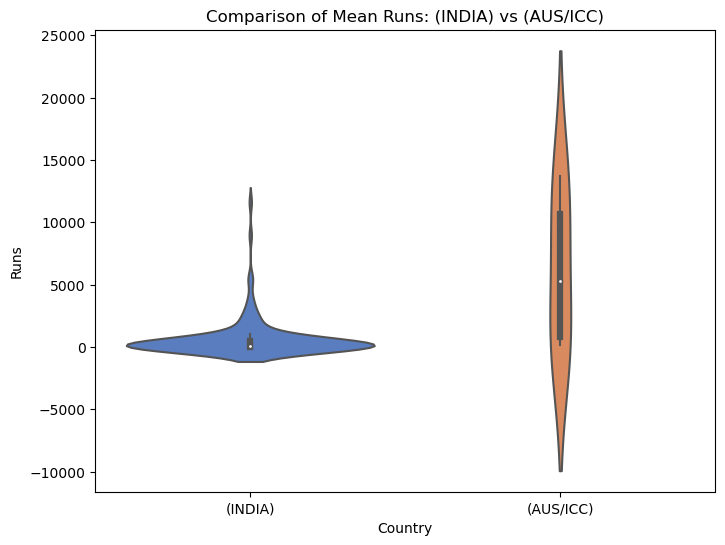

In [140]:
d = pd.DataFrame({'Country': ['(INDIA)'] * len(g1) + ['(AUS/ICC)'] * len(g2),
                     'Runs': np.concatenate([g1, g2])})
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country', y='Runs', data=d, palette='muted')
plt.title('Comparison of Mean Runs: (INDIA) vs (AUS/ICC)')
plt.xlabel('Country')
plt.ylabel('Runs')
plt.show()

## Hypothesis: There is a moderate linear relationship between player's batting average and both their strike rate and number of balls faced
We reject this hypothesis, as it can be seen by the visualizations and the resuklts of polynomial regression that the relationship between the batting average and both their strike rate and number of balls faced is non-linear, as batting average can be influenced by other factors as well.

In [120]:
correlation1 = batting['Ave'].corr(batting['SR'])
print(f"Correlation between Batting Average and Strike Rate: {correlation1}")

Correlation between Batting Average and Strike Rate: 0.4738568874296216


In [121]:
correlation2 = batting['Ave'].corr(batting['BF'])
print(f"Correlation between Batting Average and Balls Faced: {correlation2}")

Correlation between Batting Average and Balls Faced: 0.48407155789856293


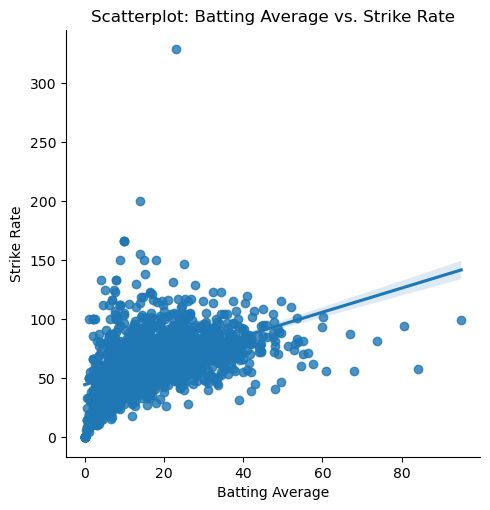

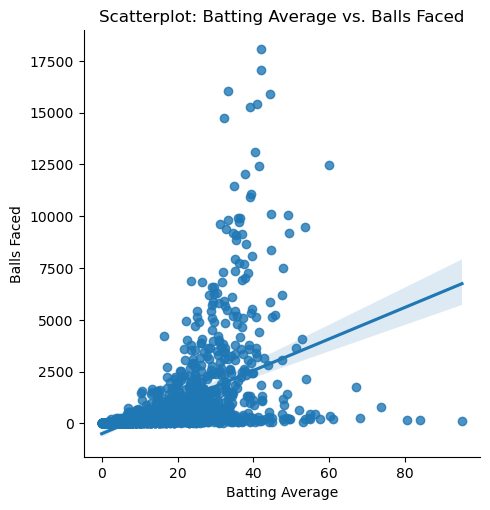

In [137]:
sns.lmplot(x='Ave', y='SR', data=batting)
plt.title('Scatterplot: Batting Average vs. Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.show()

# Scatterplot and regression line for Batting Average vs. Balls Faced
sns.lmplot(x='Ave', y='BF', data=batting)
plt.title('Scatterplot: Batting Average vs. Balls Faced')
plt.xlabel('Batting Average')
plt.ylabel('Balls Faced')
plt.show()


In [138]:
X = np.column_stack((batting['SR'], batting['SR'] ** 2))
X = sm.add_constant(X)
model_poly_SR = sm.OLS(batting['Ave'], X).fit()
print(model_poly_SR.summary())

# Polynomial regression (second degree) for Batting Average vs. Balls Faced
X = np.column_stack((batting['BF'], batting['BF'] ** 2))
X = sm.add_constant(X)
model_poly_BF = sm.OLS(batting['Ave'], X).fit()
print(model_poly_BF.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ave   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     326.4
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.06e-120
Time:                        14:21:20   Log-Likelihood:                -6386.5
No. Observations:                1704   AIC:                         1.278e+04
Df Residuals:                    1701   BIC:                         1.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4225      0.843     -2.874      0.0

## Hypothesis: There is a significant difference between the batting average of different players/countries
the low P-value and the F-statistic being greater than 1 suggests that there are very few variations in the mean averages among the countries hence rejecting this hypothesis and indicating that the batting averages are not much different for different players and countries. Since it can be proved by conducting the Tuckey's test and getting the output as False in the reject column showing not much difference in the batting averages.

In [122]:
f_statistic, p_value = f_oneway(*[batting[batting['Country'] == country]['Ave'] for country in batting['Country'].unique()])
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.18490831019087
P-value: 1.1958839242468402e-05


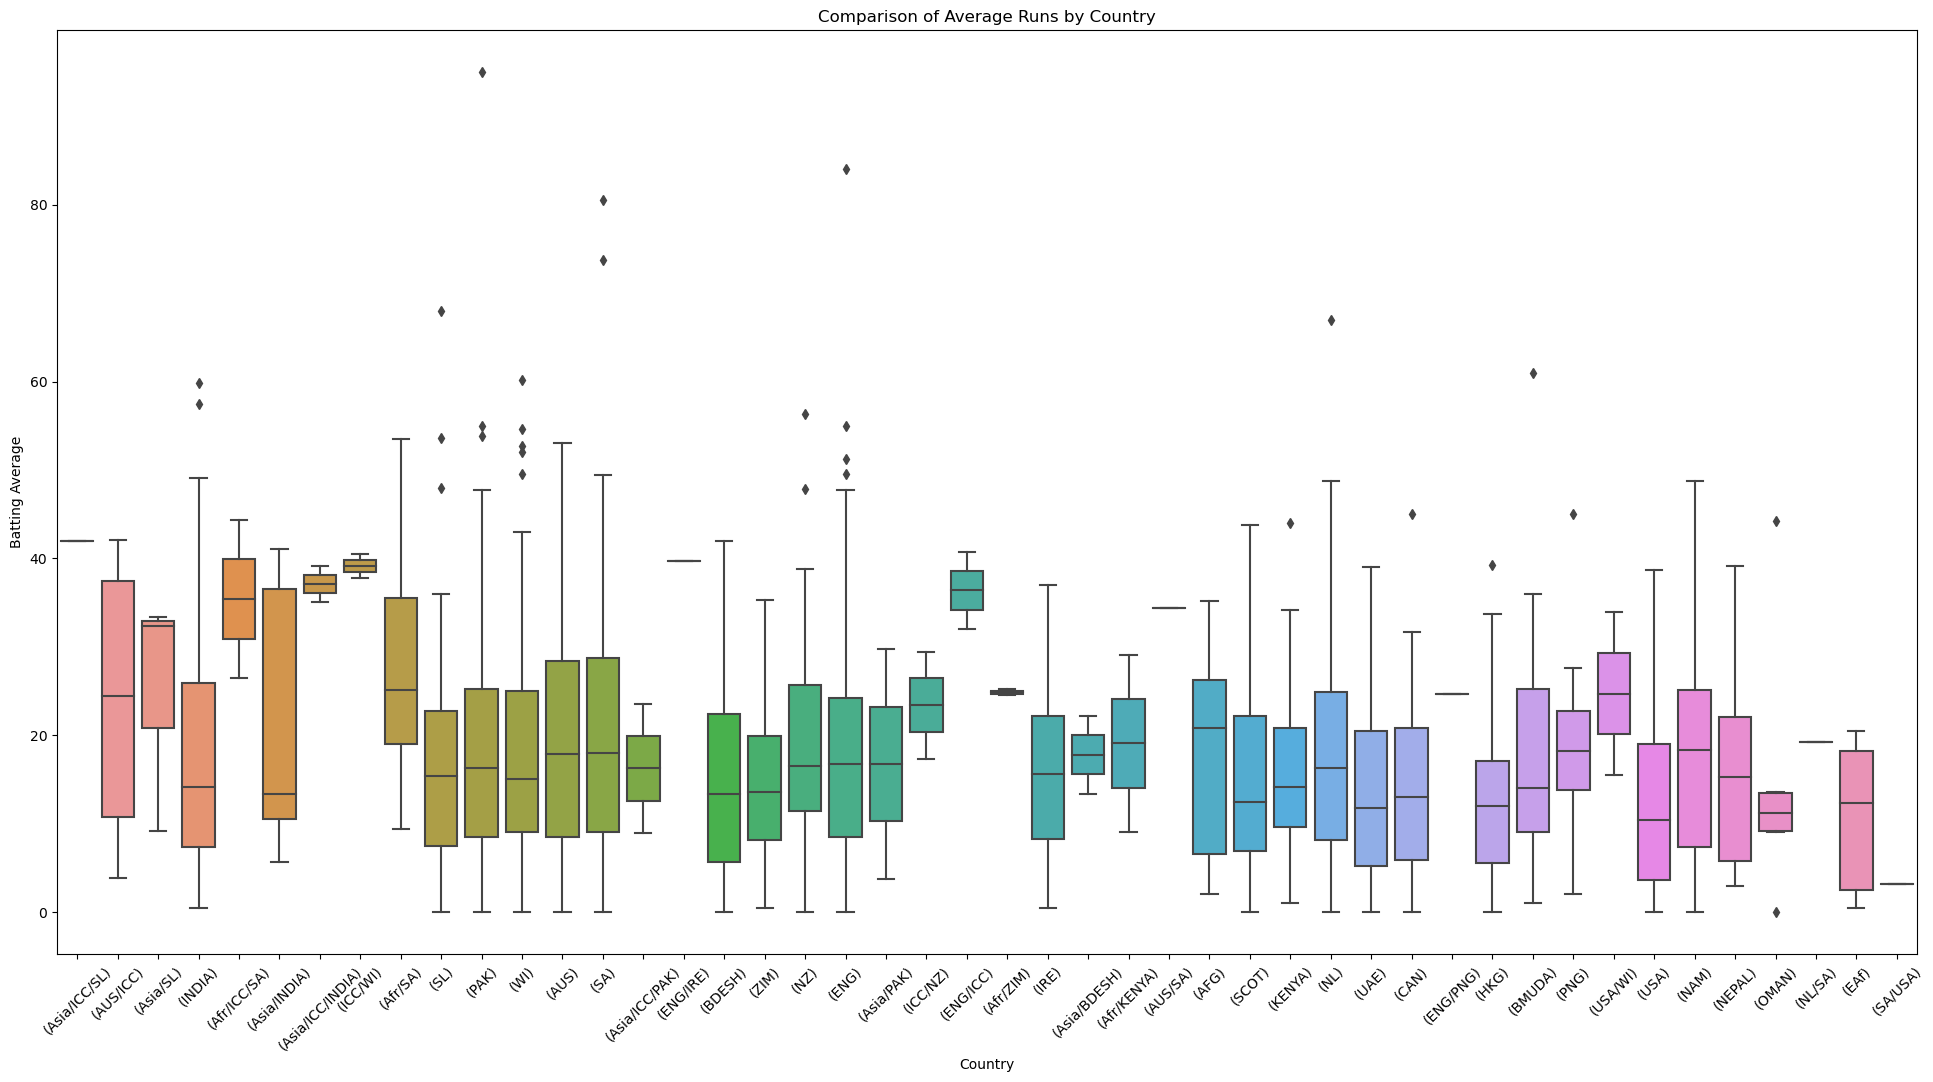

In [125]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=batting, x='Country', y='Ave')
plt.title('Comparison of Average Runs by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

In [136]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(batting['Ave'], batting['Country'])

# Print the summary of the test
print(tukey.summary())


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj    lower    upper  reject
--------------------------------------------------------------------------
           (AFG)            (AUS)    2.193    1.0   -7.5999 11.9859  False
           (AFG)        (AUS/ICC)   6.4911    1.0  -18.7003 31.6825  False
           (AFG)         (AUS/SA)  17.1411    1.0  -30.8219 65.1041  False
           (AFG)     (Afr/ICC/SA)  18.1961 0.9958  -16.2987 52.6908  False
           (AFG)      (Afr/KENYA)   1.8611    1.0  -32.6337 36.3558  False
           (AFG)         (Afr/SA)   9.9033 0.9914   -8.1554  27.962  False
           (AFG)        (Afr/ZIM)   7.6761    1.0  -26.8187 42.1708  False
           (AFG)     (Asia/BDESH)   0.5961    1.0  -33.8987 35.0908  False
           (AFG) (Asia/ICC/INDIA)  19.8961 0.9797  -14.5987 54.3908  False
           (AFG)   (Asia/ICC/PAK)  -0.9489    1.0  -35.4437 33.5458  False
           (AFG)    (Asia

## Hypothesis: A player's batting average and strike rate are relative, as if the average is higher than the strike rate is higher too
The positive correlation coefficient and a low P-value suggests that there is positive linear relationship between the batting average and strike rate as it can be seen that if one of it increases, than the other increases too following the trend.

In [127]:
correlation, p_value = pearsonr(batting['Ave'], batting['SR'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.47385688742962173
P-value: 4.214605328785315e-96


<Figure size 1000x800 with 0 Axes>

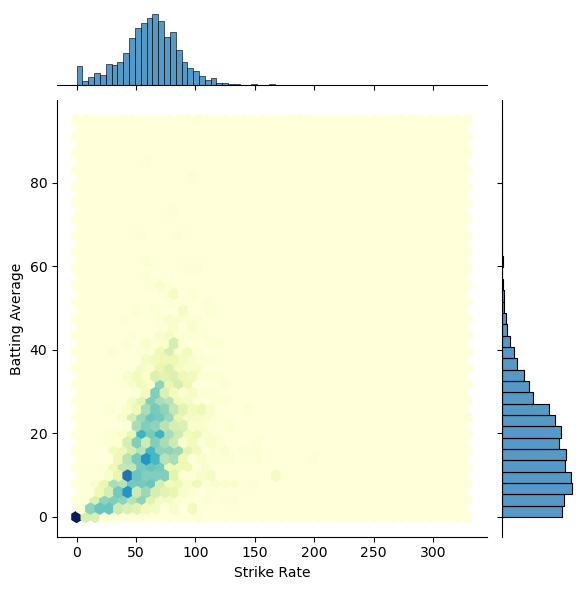

In [128]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=batting, x='SR', y='Ave', kind='hex', cmap='YlGnBu')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.show()

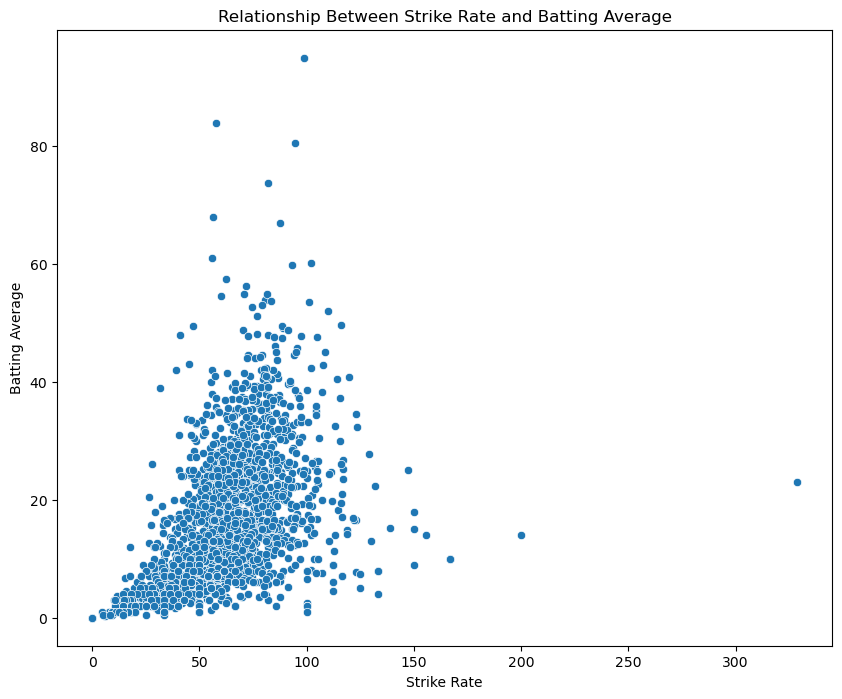

In [129]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=batting, x='SR', y='Ave')
plt.title('Relationship Between Strike Rate and Batting Average')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.show()

## Hypothesis: the frequency of centuries and ducks scored by players might not be independent of the country they belong to.
The higher CHi-square test value and 0.0 P-value suggests a strong association between the ducks and centuries scored with the countries. Showing that it doesnt matter if a team is performing good or bad the occurance of a century or duck can be seen with any team/country

In [130]:
contingency = pd.crosstab(batting['Country'], [batting['100'], batting['0']])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 20607.484486180234
P-value: 0.0
Degrees of freedom: 5895
Expected frequencies:
[[1.05328638e+01 6.04694836e+00 2.54694836e+00 ... 1.64319249e-02
  1.64319249e-02 1.64319249e-02]
 [5.04072770e+01 2.89389671e+01 1.21889671e+01 ... 7.86384977e-02
  7.86384977e-02 7.86384977e-02]
 [1.50469484e+00 8.63849765e-01 3.63849765e-01 ... 2.34741784e-03
  2.34741784e-03 2.34741784e-03]
 ...
 [7.52347418e-01 4.31924883e-01 1.81924883e-01 ... 1.17370892e-03
  1.17370892e-03 1.17370892e-03]
 [4.58931925e+01 2.63474178e+01 1.10974178e+01 ... 7.15962441e-02
  7.15962441e-02 7.15962441e-02]
 [3.42318075e+01 1.96525822e+01 8.27758216e+00 ... 5.34037559e-02
  5.34037559e-02 5.34037559e-02]]


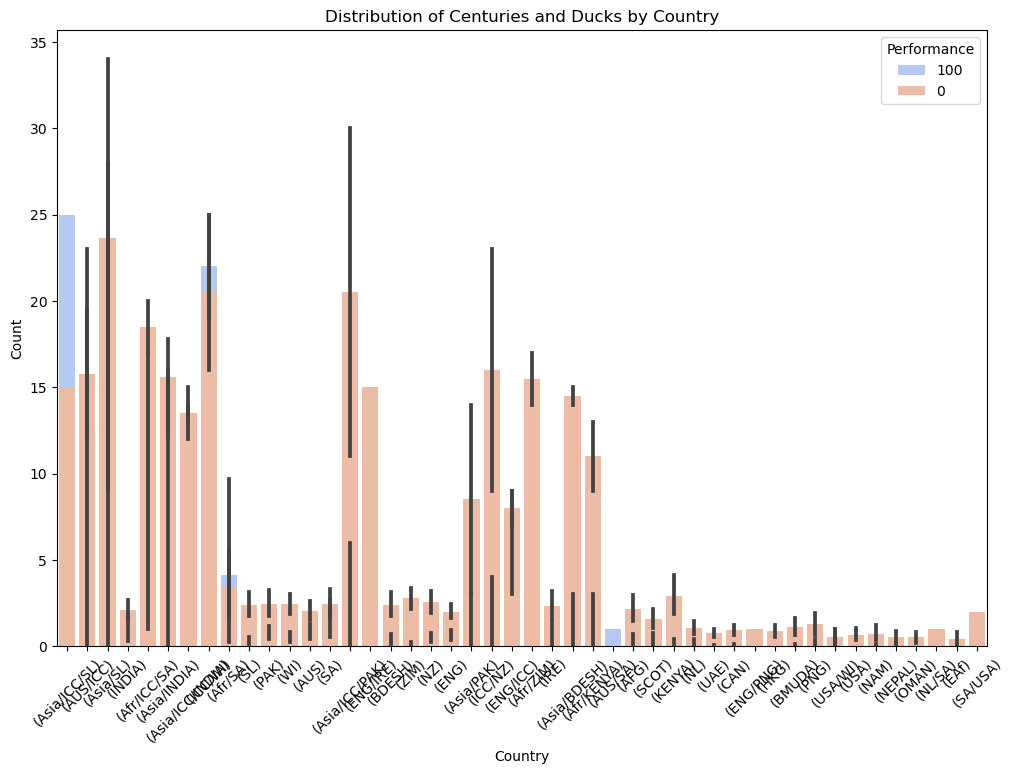

In [131]:
c_d = batting[['Country', '100', '0']]
c_d = c_d.melt(id_vars='Country', var_name='Performance', value_name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=c_d, x='Country', y='Count', hue='Performance', palette='coolwarm', dodge=False)
plt.title('Distribution of Centuries and Ducks by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Performance')
plt.xticks(rotation=45)
plt.show()

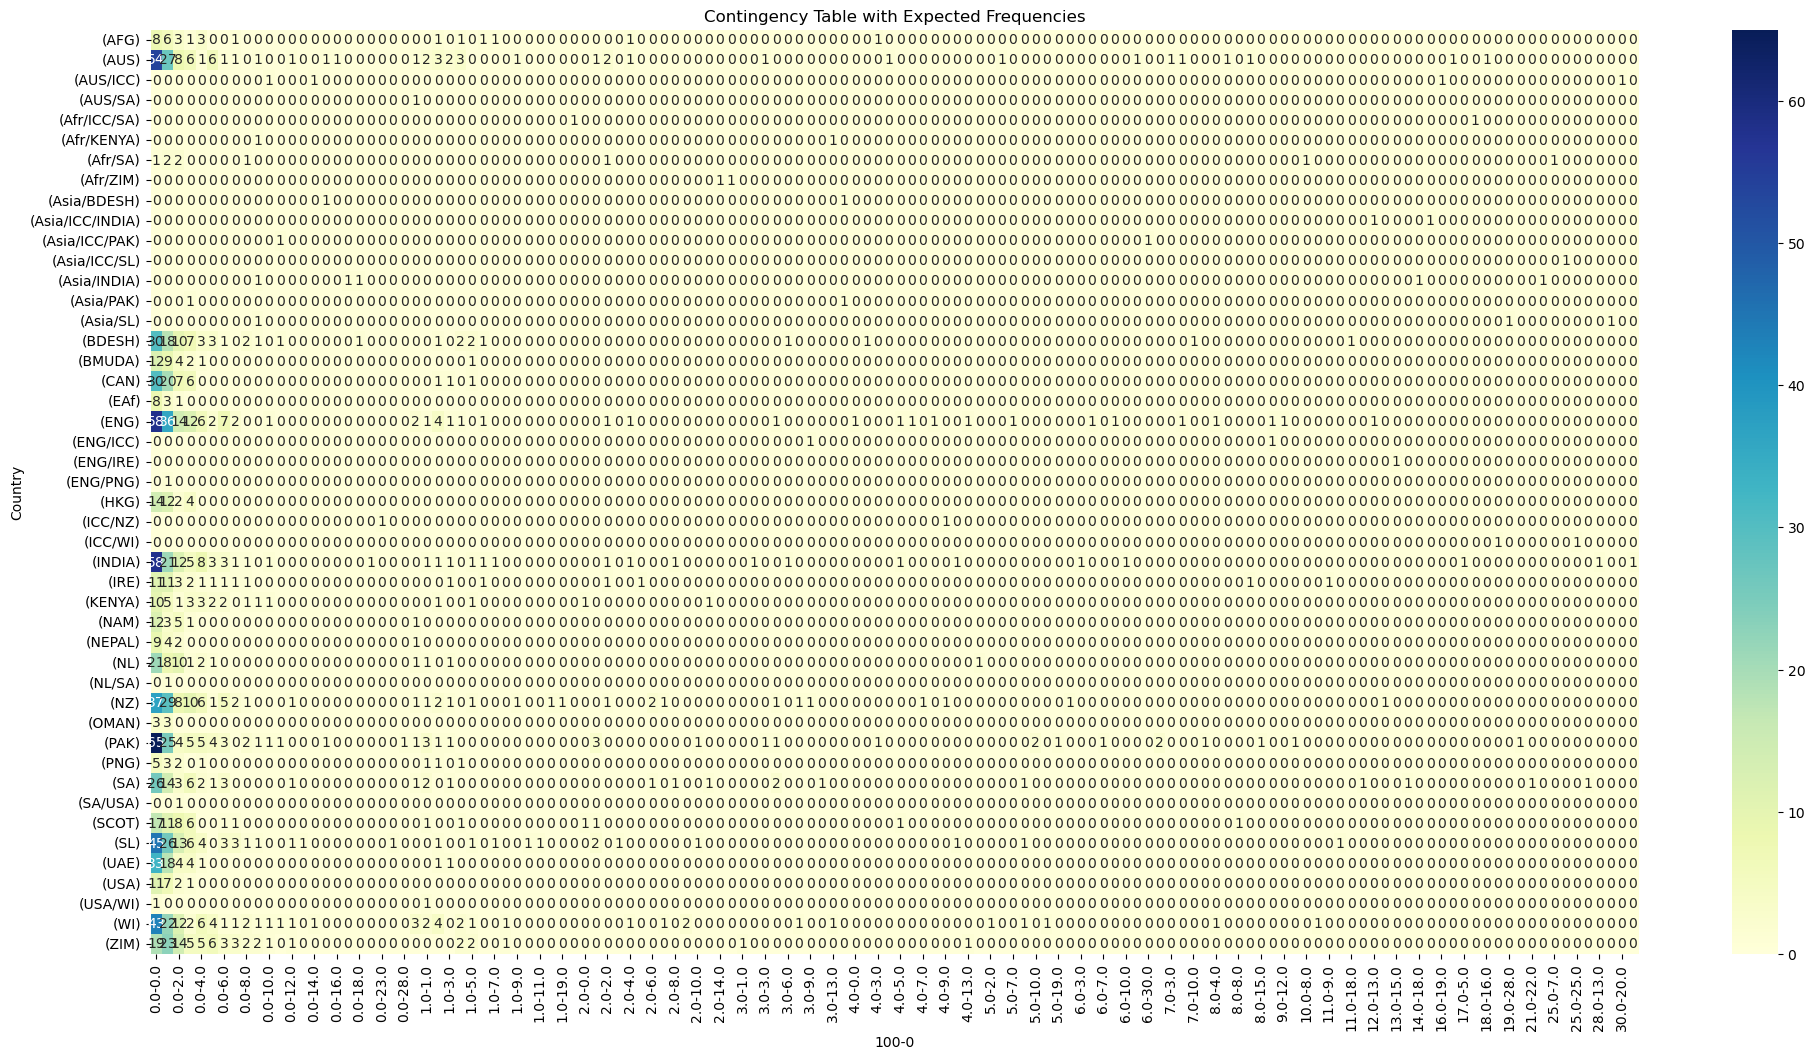

In [134]:
plt.figure(figsize=(24, 12))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.title('Contingency Table with Expected Frequencies')
plt.show()